In [1]:
import collections
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.corpus import stopwords

In [2]:
%load_ext autoreload
%autoreload 2
from context_predictor.predictor import *
%aimport context_predictor.predictor

In [3]:
data = read_data('../data/abs1.txt')
len(data)

100000

In [4]:
%%time

vocabulary_size = 5000

stop_words = stopwords.words('english')

vocab, reversed_vocab = build_vocabulary(data, vocabulary_size, stop_words)

len(reversed_vocab)

CPU times: user 11.5 s, sys: 908 ms, total: 12.4 s
Wall time: 12.4 s


# Building datasets

In [5]:
%%time

qq = clean_data(data)

CPU times: user 45.4 s, sys: 704 ms, total: 46.1 s
Wall time: 46.1 s


In [6]:
test = qq[0]

In [7]:
dataset = []
for sentence in test:
    dataset.extend(build_dataset(sentence, vocab))

In [8]:
dataset

[('background', ['currently']),
 ('currently', ['background', 'used', 'prevent']),
 ('used', ['currently', 'prevent', 'stroke']),
 ('prevent', ['currently', 'used', 'stroke', 'patients']),
 ('stroke', ['used', 'prevent', 'patients']),
 ('patients', ['prevent', 'stroke', 'atrial', 'fibrillation']),
 ('atrial', ['patients', 'fibrillation']),
 ('fibrillation', ['patients', 'atrial']),
 ('measuring', ['coagulation', 'function', 'may']),
 ('coagulation', ['measuring', 'function', 'may', 'help']),
 ('function', ['measuring', 'coagulation', 'may', 'help', 'clinicians']),
 ('may', ['measuring', 'coagulation', 'function', 'help', 'clinicians']),
 ('help', ['coagulation', 'function', 'may', 'clinicians', 'understand']),
 ('clinicians', ['function', 'may', 'help', 'understand']),
 ('understand', ['help', 'clinicians', 'effects']),
 ('effects', ['understand', 'drug']),
 ('drug', ['effects', 'associated']),
 ('associated', ['drug', 'risk', 'bleeding']),
 ('risk', ['associated', 'bleeding']),
 ('ble

In [9]:
dataset_ohe = []
for elem in dataset:
    dataset_ohe.append((get_ohe([elem[0]], vocab), normalize_ohe(get_ohe(elem[1], vocab))))
dataset_ohe = np.array(dataset_ohe)

In [10]:
dataset_ohe[:,0].T.shape

(5000, 139)

In [11]:
dataset_ohe[:,1].shape

(139, 5000)

In [12]:
print(np.sum(get_ohe(dataset[0][1], vocab)))

1.0


In [13]:
qq[40:50]

[[['gastrin',
   'is',
   'a',
   'hormone',
   'produced',
   'by',
   'g-cells',
   'in',
   'the',
   'normal',
   'gastric',
   'antrum'],
  ['however',
   'colorectal',
   'carcinoma',
   'cells',
   'may',
   'aberrantly',
   'produce',
   'gastrin',
   'and',
   'exhibit',
   'increased',
   'expression',
   'of',
   'cholecystokinin',
   'b',
   'cck-b)/gastrin',
   'receptors'],
  ['gastrin',
   'is',
   'trophic',
   'for',
   'the',
   'normal',
   'gastric',
   'oxyntic',
   'mucosa',
   'and',
   'exerts',
   'a',
   'growth-promoting',
   'action',
   'on',
   'gastrointestinal',
   'malignancy'],
  ['thus',
   'gastrin',
   'may',
   'act',
   'as',
   'an',
   'autocrine/paracrine',
   'or',
   'endocrine',
   'factor',
   'in',
   'the',
   'initiation',
   'and',
   'progression',
   'of',
   'colorectal',
   'carcinoma'],
  ['the',
   'molecular',
   'mechanisms',
   'involved',
   'have',
   'not',
   'been',
   'elucidated'],
  ['hypergastrinemia',
   'induced',
  

# Building the NN

In [14]:
%autoreload 2
from context_predictor.predictor import *
%aimport context_predictor.predictor

In [16]:
pr = Predictor(vocabulary_size, 1)
pr.init_model()

In [1]:
for n, text in enumerate(qq[:10000]):
    dataset = []
    for sentence in text:
        dataset.extend(build_dataset(sentence, vocab))
    
    dataset_ohe = []
    for elem in dataset:
        dataset_ohe.append((get_ohe([elem[0]], vocab),
                            normalize_ohe(get_ohe(elem[1], vocab))))
    dataset_ohe = np.array(dataset_ohe)
    
    c = pr.train(dataset_ohe[:, 0], dataset_ohe[:, 1])
    
    print("iter -> {}, c is {}".format(n, c))

iter -> 0, c is 8.517193794250488
iter -> 1, c is 8.517192840576172
iter -> 2, c is 8.517192840576172
iter -> 3, c is 8.517193794250488
iter -> 4, c is 8.517193794250488
iter -> 5, c is 8.517194747924805
iter -> 6, c is 8.517192840576172
iter -> 7, c is 8.517193794250488
iter -> 8, c is 8.517193794250488
iter -> 9, c is 8.517192840576172
...


In [18]:
def prediction(q, topn_input=10):
    preds = pr.predict(get_ohe([q], vocab).reshape(1, vocabulary_size))
    preds = preds[0].reshape(vocabulary_size)

    print(q, '->', reversed_vocab[np.argmax(preds)])

    plt.figure(figsize=(5,3))
    plt.plot(preds)
    plt.show()

    topn = topn_input

    print('TOP-{}:'.format(topn))
    print('-------')

    for id in reversed(np.argsort(preds)[-topn:]):
        print(reversed_vocab[id], ' - ', id)

amino -> acid


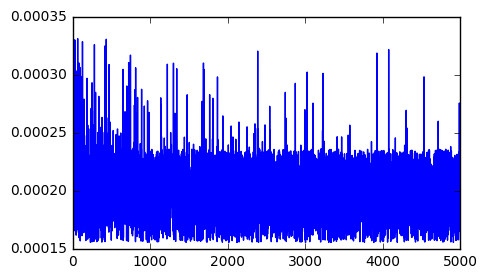

TOP-10:
-------
acid  -  66
acids  -  435
analysis  -  17
showed  -  29
sequence  -  128
sequences  -  282
residues  -  417
protein  -  7
deduced  -  4079
substitutions  -  2389


In [19]:
prediction('amino')

acid -> method


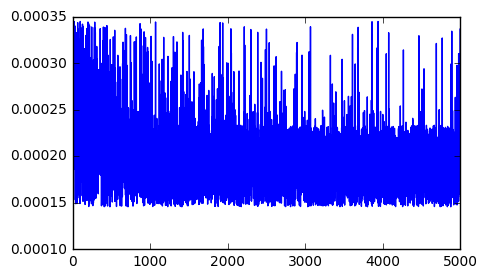

TOP-10:
-------
method  -  99
nephropathy  -  3942
levels  -  22
otherwise  -  3864
antioxidant  -  1071
treated  -  199
amino  -  286
mucosa  -  1904
acid  -  66
used  -  18


In [20]:
prediction('acid')

membrane -> surfaces


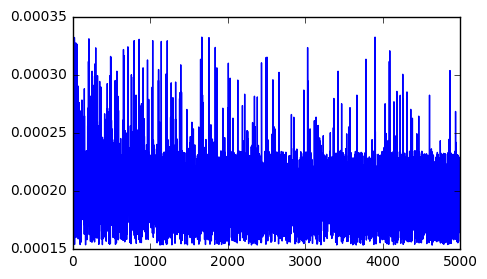

TOP-10:
-------
surfaces  -  1668
high-resolution  -  3903
associated  -  24
cytoplasm  -  1760
cell  -  5
plasma  -  211
fusion  -  859
bound  -  1034
encoding  -  795
appeared  -  1222


In [21]:
prediction('membrane')

wistar -> rats


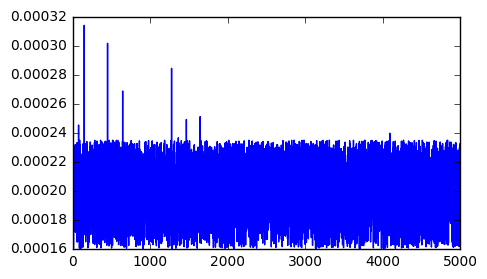

TOP-10:
-------
rats  -  149
male  -  450
divided  -  1276
female  -  645
neonatal  -  1645
maintained  -  1467
3  -  76
slices  -  4092
skeletal  -  1363
mobile  -  4269


In [22]:
prediction('wistar')

rats -> factor


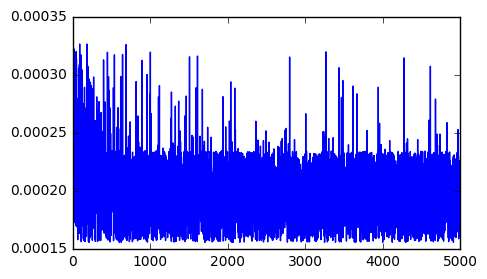

TOP-10:
-------
factor  -  92
studied  -  185
exposed  -  692
increased  -  21
control  -  47
wistar  -  3269
diabetic  -  1004
male  -  450
female  -  645
comparison  -  540


In [23]:
prediction('rats')

alkaline -> using


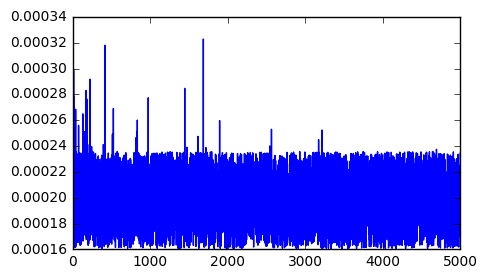

TOP-10:
-------
using  -  8
phosphatase  -  1686
ph  -  419
activity  -  12
assay  -  225
protease  -  1446
test  -  173
gene  -  10
-  -  975
studied  -  185


In [24]:
prediction('alkaline')

dna -> lesions


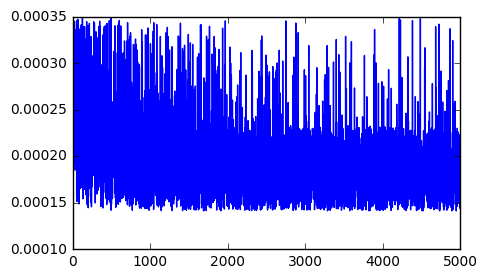

TOP-10:
-------
lesions  -  495
detected  -  127
methylated  -  4216
coated  -  4488
system  -  67
sequence  -  128
interfere  -  4231
replication  -  603
well  -  58
segregation  -  4386


In [47]:
prediction('dna')

In [ ]:
prediction('lesions')

In [48]:
JSD('dna', 'system')

0.0077514499425888062

In [49]:
JSD('dna', 'lesions')

0.0067892745137214661

mast -> cells


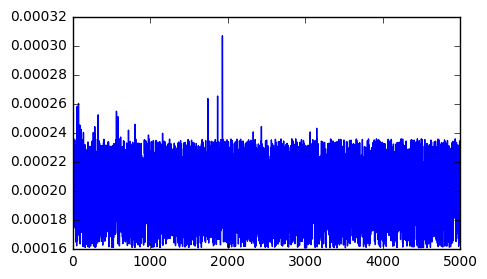

TOP-10:
-------
cells  -  1
mucosal  -  1932
cell  -  5
identity  -  1870
pneumoniae  -  1744
within  -  75
growth  -  57
beta  -  565
negative  -  329
accumulation  -  584


In [25]:
prediction('mast')

cells -> number


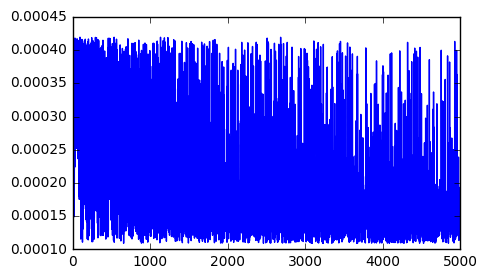

TOP-10:
-------
number  -  96
increases  -  536
stimulated  -  1135
germ  -  2685
ability  -  295
poorly  -  1230
animals  -  308
active  -  247
largely  -  1185
cells  -  1


In [26]:
prediction('cells')

# Want to calculate divergence

In [27]:
def D(q1, q2):
    p = pr.predict(get_ohe([q1], vocab).reshape(1, vocabulary_size))
    p = p[0].reshape(vocabulary_size)
    
    q = pr.predict(get_ohe([q2], vocab).reshape(1, vocabulary_size))
    q = q[0].reshape(vocabulary_size)
    
    return np.sum(p * np.log(p / q))

def Divergence(p, q):
    return np.sum(p * np.log(p / q))

def H(q1, q2):
    p = pr.predict(get_ohe([q1], vocab).reshape(1, vocabulary_size))
    p = p[0].reshape(vocabulary_size)
    
    q = pr.predict(get_ohe([q2], vocab).reshape(1, vocabulary_size))
    q = q[0].reshape(vocabulary_size)
    return -1 * np.sum(p * np.log(q))

def JSD(q1, q2):
    p = pr.predict(get_ohe([q1], vocab).reshape(1, vocabulary_size))
    p = p[0].reshape(vocabulary_size)
    
    q = pr.predict(get_ohe([q2], vocab).reshape(1, vocabulary_size))
    q = q[0].reshape(vocabulary_size)
    
    m = (p + q) / 2
    
    return (Divergence(p, m) + Divergence(q, m)) / 2

In [28]:
D('wistar', 'rats')

0.014500629

In [29]:
D('wistar', 'acid')

0.021840919

In [30]:
D('amino', 'acid')

0.021629822

In [31]:
D('amino', 'rats')

0.017146185

In [32]:
H('wistar', 'rats')

8.5257854461669922

In [33]:
H('wistar', 'acid')

8.5331249237060547

In [34]:
JSD('wistar', 'rats')

0.0036293854936957359

In [35]:
JSD('wistar', 'acid')

0.0054964134469628334

In [36]:
JSD('amino', 'acid')

0.0054355449974536896

In [37]:
JSD('amino', 'rats')

0.0042744032107293606